In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud

In [2]:
df = pd.read_csv('/home/chef/src/DAT6003/data/processed/nlp_sentiment_analysis.csv')

In [3]:
# reorder columns to put sentiment columns before text column
df1 = df[['sentiment_label', 'sentiment_score', 'parent_issue_id'] + [col for col in df.columns if col not in ['sentiment_label', 'sentiment_score', 'parent_issue_id']]]
df1.head()

,sentiment_label,sentiment_score,parent_issue_id,Unnamed: 0,created_at,author,author_location,type,text
0,positive,0.617641,NaN,0,2018-11-05T21:35:51Z,ZhaoyueCheng,NaN,issue,Thanks a lot for the port! I have some minor q...
1,negative,0.798381,0.0,0_0,2018-11-05T22:01:47Z,ZhaoyueCheng,NaN,comment,It also seems to me that the SQuAD VERSION can...
2,negative,0.796224,0.0,0_1,2018-11-05T23:20:46Z,abeljim,NaN,comment,It also seems to me that the SQuAD VERSION can...
3,neutral,0.802384,0.0,0_3,2018-11-06T02:05:22Z,abeljim,NaN,comment,"Just ran on 1 GPU batch size of 10, the result..."
4,neutral,0.538394,0.0,0_4,2018-11-06T03:48:21Z,ZhaoyueCheng,NaN,comment,"Sure, Thanks, I'm checking for the reason too,..."


In [4]:
# count how many of each sentiment label
df1['sentiment_label'].value_counts()

sentiment_label
neutral     26444
positive     6856
negative     6753
Name: count, dtype: int64

In [5]:
# view the spread of sentiment score confidence
df1['sentiment_score'].describe()

count    40053.000000
mean         0.734860
std          0.135882
min          0.352357
25%          0.620786
50%          0.747841
75%          0.849596
max          0.990493
Name: sentiment_score, dtype: float64

In [6]:
# Visualising some results
counts_df = df1['sentiment_score'].value_counts()
counts_df.head()

sentiment_score
0.530812    102
0.837178     92
0.837178     85
0.863279     50
0.701751     24
Name: count, dtype: int64

In [7]:
len(counts_df)

39050

Text(0.5, 1.0, 'Number of posts by classification label')

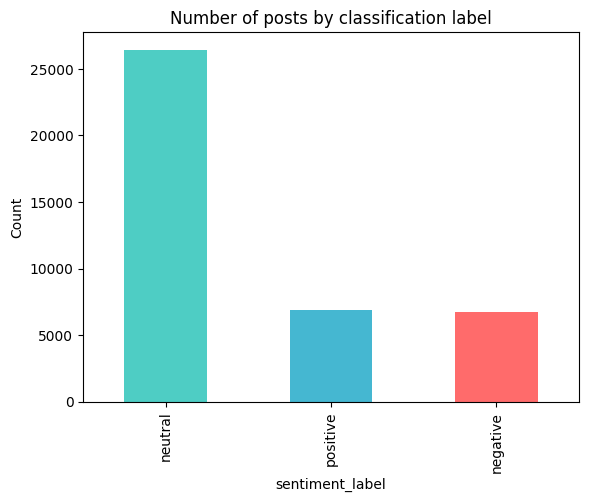

In [8]:
df1['sentiment_label'].value_counts().plot(kind='bar',color=['#4ECDC4', '#45B7D1',  '#FF6B6B'])
plt.ylabel('Count')
plt.title('Number of posts by classification label')

Text(0.5, 1.0, 'Sentiment distribution')

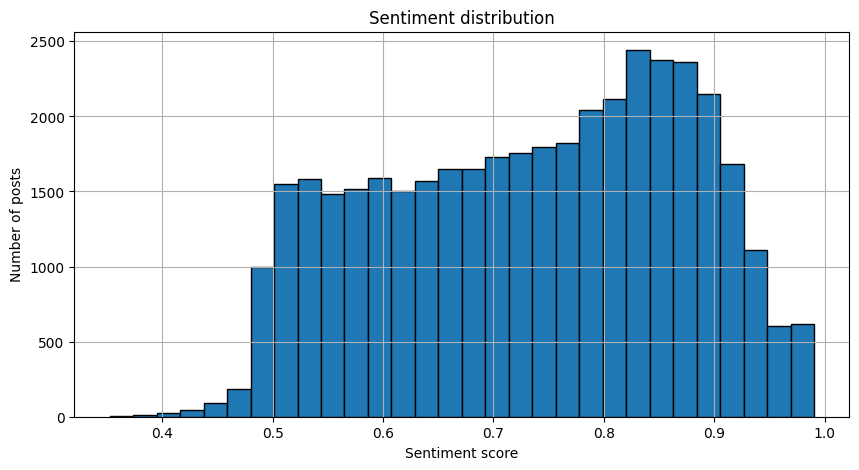

In [9]:
plt.figure(figsize=(10, 5))
df1['sentiment_score'].hist(bins=30, edgecolor='black')
plt.ylabel("Number of posts")
plt.xlabel("Sentiment score")
plt.title("Sentiment distribution")

Text(0.5, 1.0, 'Average sentiment confidence by classification')

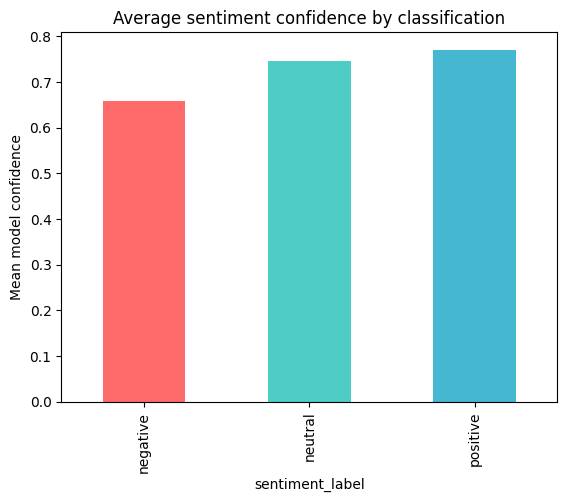

In [10]:
df.groupby("sentiment_label")["sentiment_score"].mean().plot(kind="bar", color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
plt.ylabel("Mean model confidence")
plt.title("Average sentiment confidence by classification")

In [11]:
# Convert created_at column to datetime
df1['created_at'] = pd.to_datetime(df1['created_at'])
df1['created_at'].head()

0   2018-11-05 21:35:51+00:00
1   2018-11-05 22:01:47+00:00
2   2018-11-05 23:20:46+00:00
3   2018-11-06 02:05:22+00:00
4   2018-11-06 03:48:21+00:00
Name: created_at, dtype: datetime64[ns, UTC]

/tmp/ipykernel_99235/1577987931.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sentiment_over_time_weekly = df1_sorted.groupby([pd.Grouper(freq='M'), 'sentiment_label']).size().unstack(fill_value=0)


<Figure size 1400x600 with 0 Axes>

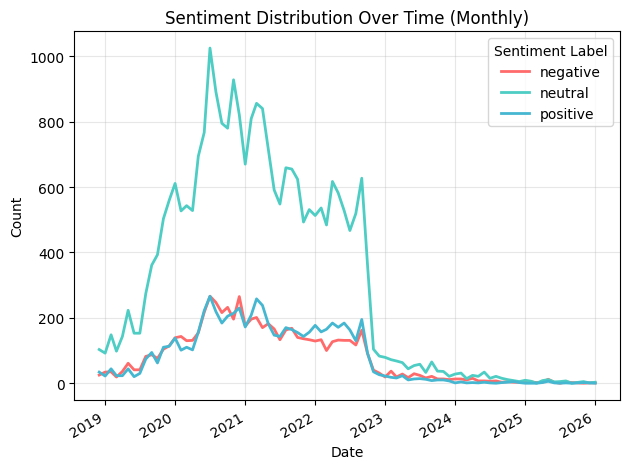

In [12]:
# Sentiment distribution over time (weekly aggregation for cleaner view)
df1_sorted = df1.sort_values('created_at')
df1_sorted.set_index('created_at', inplace=True)
sentiment_over_time_weekly = df1_sorted.groupby([pd.Grouper(freq='M'), 'sentiment_label']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 6))
sentiment_over_time_weekly.plot(kind='line', linewidth=2, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Sentiment Distribution Over Time (Monthly)')
plt.legend(title='Sentiment Label')
plt.grid(True, alpha=0.3)
plt.tight_layout()

<Figure size 1400x600 with 0 Axes>

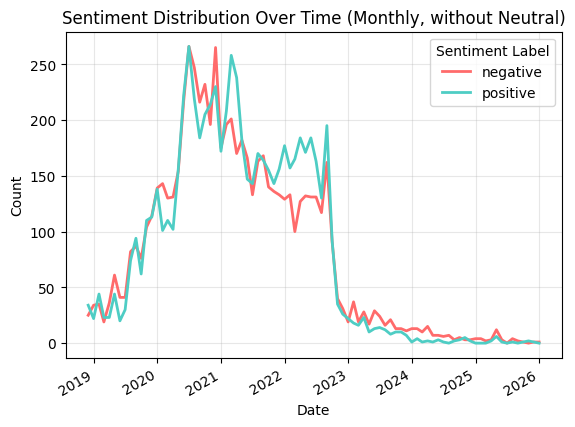

In [13]:
# Plotting without neutral for clarity
plt.figure(figsize=(14, 6))
sentiment_over_time_weekly[['negative', 'positive']].plot(kind='line', linewidth=2, color=['#FF6B6B', '#4ECDC4'])
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Sentiment Distribution Over Time (Monthly, without Neutral)')
plt.legend(title='Sentiment Label')
plt.grid(True, alpha=0.3)

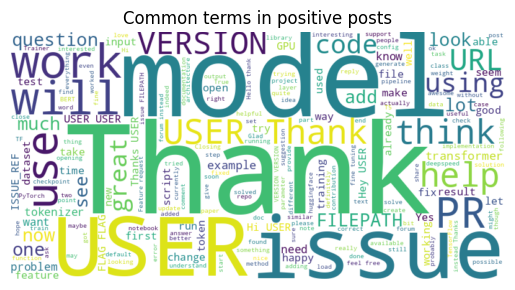

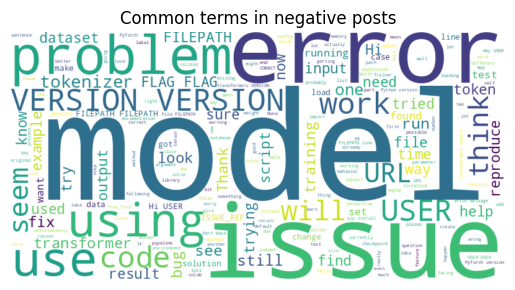

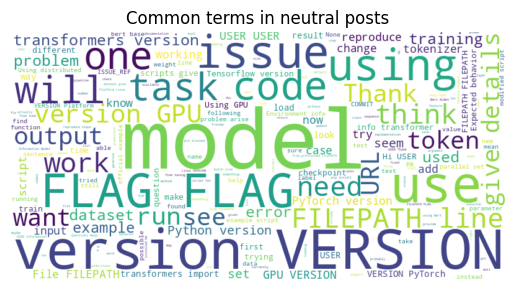

In [14]:
# Plot a wordcloud
def plot_wordcloud(texts, title):
    wc = WordCloud(width=800, height=400, background_color="white").generate(" ".join(texts))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

for label in ["positive", "negative", "neutral"]:
    texts = df[df["sentiment_label"] == label]["text"].dropna().tolist()
    plot_wordcloud(texts, f"Common terms in {label} posts")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Switzerland'),
  Text(1, 0, 'Italy'),
  Text(2, 0, 'United Kingdom'),
  Text(3, 0, 'Japan'),
  Text(4, 0, 'Germany'),
  Text(5, 0, 'Singapore'),
  Text(6, 0, 'Canada'),
  Text(7, 0, 'United States'),
  Text(8, 0, 'France'),
  Text(9, 0, 'Unspecified'),
  Text(10, 0, 'Ireland'),
  Text(11, 0, 'India'),
  Text(12, 0, 'China'),
  Text(13, 0, 'South Korea'),
  Text(14, 0, 'Belgium')])

<Figure size 2000x1000 with 0 Axes>

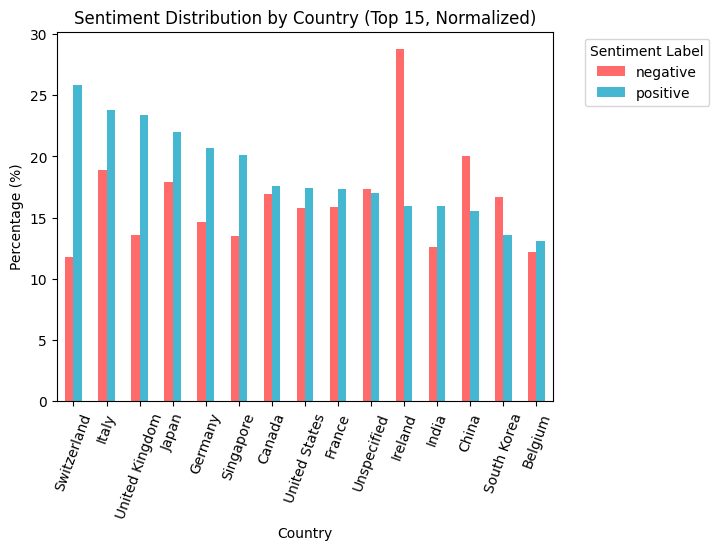

In [23]:
# Get top 10 countries (treating null as 'unspecified')
df1_with_unspecified = df1.copy()
df1_with_unspecified['author_location'] = df1_with_unspecified['author_location'].fillna('unspecified')
top_countries = df1_with_unspecified['author_location'].value_counts().head(15).index

import geonamescache
gc = geonamescache.GeonamesCache()
country_map = {country['iso']: country['name'] for country in gc.get_countries().values()}
country_map['unspecified'] = 'Unspecified'

# Count sentiment labels by country and normalize to percentages
country_sentiment_counts = df1_with_unspecified[df1_with_unspecified['author_location'].isin(top_countries)].groupby(['author_location', 'sentiment_label']).size().unstack(fill_value=0)
country_sentiment = country_sentiment_counts.div(country_sentiment_counts.sum(axis=1), axis=0) * 100
country_sentiment = country_sentiment.sort_values(by='positive', ascending=False)

country_sentiment.index = country_sentiment.index.map(lambda x: country_map.get(x, x))
country_sentiment = country_sentiment[['negative', 'positive']]  # only keep negative and positive for clarity

plt.figure(figsize=(20, 10))
country_sentiment.plot(kind='bar', color=['#FF6B6B', '#45B7D1'])    
plt.ylabel('Percentage (%)')
plt.xlabel('Country')
plt.title('Sentiment Distribution by Country (Top 15, Normalized)')
plt.legend(title='Sentiment Label', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=70)

In [16]:
country_sentiment_counts['total'] = country_sentiment_counts['negative'] + country_sentiment_counts['positive'] + country_sentiment_counts['neutral']
country_sentiment_counts = country_sentiment_counts.sort_values('total', ascending=False)
country_sentiment_counts

sentiment_label,negative,neutral,positive,total
author_location,,,,
unspecified,4714,17805,4628,27147
US,497,2104,548,3149
CA,296,1147,308,1751
IN,199,1126,251,1576
BE,153,937,164,1254
DE,130,573,183,886
FR,109,459,119,687
CN,95,306,74,475
IE,92,177,51,320


This data does not take into account duplicates - highly active users from identified regions are counted numerous times, so this data is also showing a general, total frequency from those countries but not a unique commenter frequency from those countries. This data will be skewed by highly active users from select locations.

In [17]:
df2 = pd.read_csv('/home/chef/src/DAT6003/data/processed/nlp_sentiment_analysis_with_emotion.csv')

In [18]:
df2.head()

,Unnamed: 0,created_at,author,author_location,type,text,parent_issue_id,sentiment_label,sentiment_score,emotion_label,emotion_score
0,0,2018-11-05T21:35:51Z,ZhaoyueCheng,NaN,issue,Thanks a lot for the port! I have some minor q...,NaN,positive,0.617641,neutral,0.483437
1,0_0,2018-11-05T22:01:47Z,ZhaoyueCheng,NaN,comment,It also seems to me that the SQuAD VERSION can...,0.0,negative,0.798381,neutral,0.521882
2,0_1,2018-11-05T23:20:46Z,abeljim,NaN,comment,It also seems to me that the SQuAD VERSION can...,0.0,negative,0.796224,neutral,0.623931
3,0_3,2018-11-06T02:05:22Z,abeljim,NaN,comment,"Just ran on 1 GPU batch size of 10, the result...",0.0,neutral,0.802384,neutral,0.912427
4,0_4,2018-11-06T03:48:21Z,ZhaoyueCheng,NaN,comment,"Sure, Thanks, I'm checking for the reason too,...",0.0,neutral,0.538394,neutral,0.888291


In [19]:
df2 = df2[['sentiment_label', 'sentiment_score', 'parent_issue_id', 'emotion_label', 'emotion_score'] + [col for col in df.columns if col not in ['sentiment_label', 'sentiment_score', 'parent_issue_id', 'emotion_label', 'emotion_score']]]

In [20]:
df2.head()

,sentiment_label,sentiment_score,parent_issue_id,emotion_label,emotion_score,Unnamed: 0,created_at,author,author_location,type,text
0,positive,0.617641,NaN,neutral,0.483437,0,2018-11-05T21:35:51Z,ZhaoyueCheng,NaN,issue,Thanks a lot for the port! I have some minor q...
1,negative,0.798381,0.0,neutral,0.521882,0_0,2018-11-05T22:01:47Z,ZhaoyueCheng,NaN,comment,It also seems to me that the SQuAD VERSION can...
2,negative,0.796224,0.0,neutral,0.623931,0_1,2018-11-05T23:20:46Z,abeljim,NaN,comment,It also seems to me that the SQuAD VERSION can...
3,neutral,0.802384,0.0,neutral,0.912427,0_3,2018-11-06T02:05:22Z,abeljim,NaN,comment,"Just ran on 1 GPU batch size of 10, the result..."
4,neutral,0.538394,0.0,neutral,0.888291,0_4,2018-11-06T03:48:21Z,ZhaoyueCheng,NaN,comment,"Sure, Thanks, I'm checking for the reason too,..."


In [21]:
df2 = df2.set_index('Unnamed: 0')

In [22]:
df2.head()

,sentiment_label,sentiment_score,parent_issue_id,emotion_label,emotion_score,created_at,author,author_location,type,text
Unnamed: 0,,,,,,,,,,
0,positive,0.617641,NaN,neutral,0.483437,2018-11-05T21:35:51Z,ZhaoyueCheng,NaN,issue,Thanks a lot for the port! I have some minor q...
0_0,negative,0.798381,0.0,neutral,0.521882,2018-11-05T22:01:47Z,ZhaoyueCheng,NaN,comment,It also seems to me that the SQuAD VERSION can...
0_1,negative,0.796224,0.0,neutral,0.623931,2018-11-05T23:20:46Z,abeljim,NaN,comment,It also seems to me that the SQuAD VERSION can...
0_3,neutral,0.802384,0.0,neutral,0.912427,2018-11-06T02:05:22Z,abeljim,NaN,comment,"Just ran on 1 GPU batch size of 10, the result..."
0_4,neutral,0.538394,0.0,neutral,0.888291,2018-11-06T03:48:21Z,ZhaoyueCheng,NaN,comment,"Sure, Thanks, I'm checking for the reason too,..."


<Figure size 2000x1000 with 0 Axes>

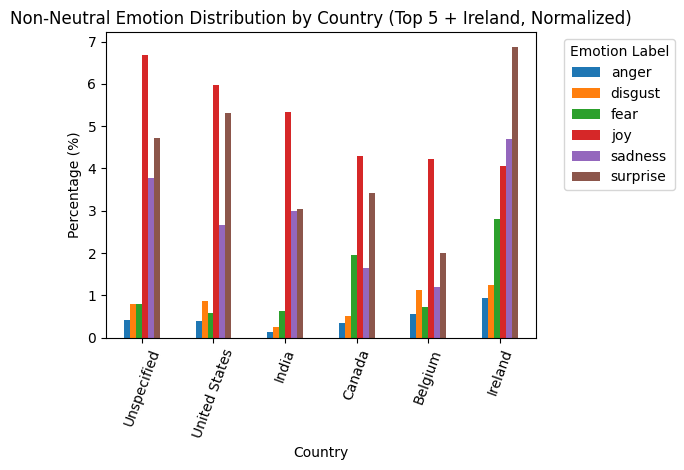

In [25]:
# Plot the emotion distribution for the top 5 active countries (or unknown category) and ensure Ireland is included

df2_with_unspecified = df2.copy()
df2_with_unspecified['author_location'] = df2_with_unspecified['author_location'].fillna('unspecified')

base_top = df1_with_unspecified['author_location'].value_counts().head(5).index.tolist()
force_include = ['IE', 'IRL', 'Ireland']  # common Ireland variants
seen = set()
top_countries = []
for c in base_top + force_include:
    if c not in seen:
        seen.add(c)
        top_countries.append(c)

country_map = {country['iso']: country['name'] for country in gc.get_countries().values()}
country_map['unspecified'] = 'Unspecified'
country_map.setdefault('IE', 'Ireland')
country_map.setdefault('IRL', 'Ireland')
country_map.setdefault('Ireland', 'Ireland')

country_emotion_counts = df2_with_unspecified[df2_with_unspecified['author_location'].isin(top_countries)].groupby(['author_location', 'emotion_label']).size().unstack(fill_value=0)
country_emotion = country_emotion_counts.div(country_emotion_counts.sum(axis=1), axis=0) * 100
country_emotion.index = country_emotion.index.map(lambda x: country_map.get(x, x))

emotion_cols = [emotion for emotion in country_emotion.columns if emotion != 'neutral']
country_emotion = country_emotion[emotion_cols]

country_emotion = country_emotion.sort_values(by='joy', ascending=False)

plt.figure(figsize=(20, 10))
country_emotion.plot(kind='bar')
plt.ylabel('Percentage (%)')
plt.xlabel('Country')
plt.title('Non-Neutral Emotion Distribution by Country (Top 5 + Ireland, Normalized)')
plt.legend(title='Emotion Label', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()